# Resultados

In [1]:
import yaml
import pandas as pd
import matplotlib.pyplot as plt

from yaml.loader import SafeLoader

In [2]:
results = {}
with open('results.yaml', 'r') as f:
    data = list(yaml.load_all(f, Loader = SafeLoader))

for d in data:
    for item in d['Results']:
        key = list(item.keys())[0]
        if key not in results and key != 'wordOccurrences': results[key] = list()
        if key not in results and 'loveCount' not in results:
            results['loveCount'] = list()
            results['hateCount'] = list()

        if isinstance(item[key], list):
            results['loveCount'].append(item[key][0]['love'])
            results['hateCount'].append(item[key][1]['hate'])
        else:
            results[key].append(item[key])

data = pd.DataFrame(results)
data

,numThreads,blockLength,preparationTime,searchTime,totalTime,loveCount,hateCount,mostCommonWord
0,1,552290900,2.04743,63.8632,65.9107,204700,17000,Love
1,2,276145450,1.83877,34.2807,36.1194,204700,17000,Love
2,3,184096966,1.86158,23.9048,25.7664,204700,17000,Love
3,4,138072725,1.88246,21.2554,23.1378,204700,17000,Love
4,5,110458180,1.87907,19.8401,21.7192,204700,17000,Love
...,...,...,...,...,...,...,...,...
95,96,5753030,2.68652,23.6582,26.3447,204700,17001,Love
96,97,5693720,2.74900,22.7332,25.4822,204701,17000,Love
97,98,5635621,2.07165,22.1571,24.2288,204700,17000,Love
98,99,5578695,2.07041,23.4649,25.5353,204700,17000,Love


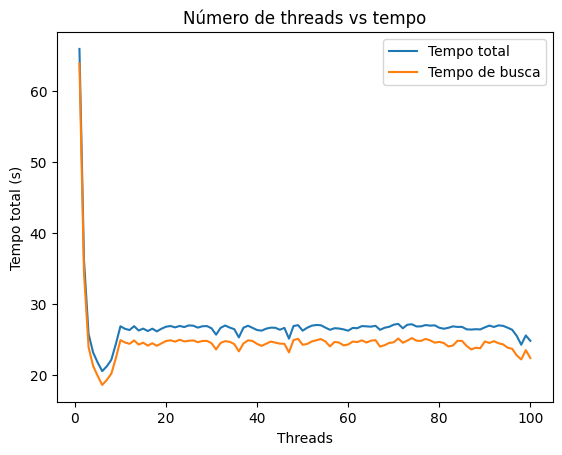

In [3]:
plt.plot(data['numThreads'], data['totalTime'], label = 'Tempo total')
plt.plot(data['numThreads'], data['searchTime'], label = 'Tempo de busca')
plt.title('Número de threads vs tempo')
plt.xlabel('Threads')
plt.ylabel('Tempo total (s)')
plt.legend()
plt.show()

Conforme o gráfico acima, podemos ver que o aumento no número de threads reduz o tempo de execução, tanto o total quanto o de busca diminuem consideravelmente conforme aumentamos o número de thread de 1 para 2, 3, até por volta de 8. Ao chegar a casa de 10 threads ainda temos um desempenho superior ao observado com uma ou duas threads, mas não temos um desempenho tão bom quanto o observado por com cerca de cinco a oito threads.

Esse comportamento se dá pelo número de cores que o computador possui. Conforme o número de threads aumenta, superando o número de cores, começamos a ter over head, o que acaba fazendo com que o tempo de execução (tanto o total quanto o de busca) aumente.